In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("India_new_car_sales_by_make.csv")
df

,Year,Month,Make,Quantity,Pct
0,2015,1,Toyota,2884,22.7
1,2015,1,Volkswagen,2521,19.9
2,2015,1,Mahindra,1029,8.1
3,2015,1,Ford,870,6.9
4,2015,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2025,1,Force Motors,3,0.0
4373,2025,1,Maserati,2,0.0
4374,2025,1,Ferrari,1,0.0
4375,2025,1,Smart,1,0.0


In [3]:
df.isnull().sum()

Year         0
Month        0
Make        10
Quantity     0
Pct          0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Year        0
Month       0
Make        0
Quantity    0
Pct         0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

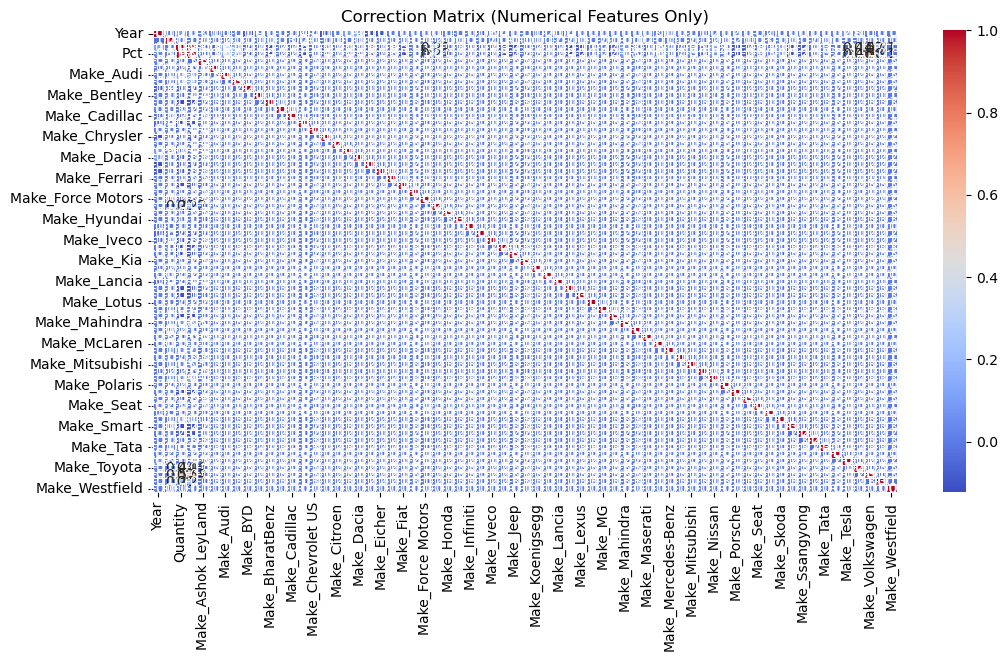

In [7]:
df_encoded = pd.get_dummies(df, columns= ["Make"], drop_first= False)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title('Correction Matrix (Numerical Features Only)')
plt.show()

In [8]:
df

,Year,Month,Make,Quantity,Pct
0,2015,1,Toyota,2884,22.7
1,2015,1,Volkswagen,2521,19.9
2,2015,1,Mahindra,1029,8.1
3,2015,1,Ford,870,6.9
4,2015,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2025,1,Force Motors,3,0.0
4373,2025,1,Maserati,2,0.0
4374,2025,1,Ferrari,1,0.0
4375,2025,1,Smart,1,0.0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X = df_encoded.drop(columns=["Quantity", "Pct"])
y = df_encoded['Quantity']

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.25, random_state = 40)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVR

In [14]:
rf_model = SVR()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [17]:
print("\n🔹 Random Forest Regression Performance:")
print(f'MAE: {rf_mae: 2f}')
print(f'MSE: {rf_mse: 2f}')
print(f'R^2 Score: {rf_r2: 2f}')


🔹 Random Forest Regression Performance:
MAE:  238.572342
MSE:  178970.477819
R^2 Score: -0.031702


In [18]:
future_data = pd.DataFrame({
    "Year": [2028],
    "Month": [8],
    "Make_Toyota": [0],
    "Make_Volkswogen": [0],
    "Make_Mahindra": [0],
    "Make_Tata": [1],
})

In [19]:
future_data = future_data.reindex(columns= X.columns, fill_value=0)
future_data_scaled = scaler.transform(future_data)
future_pred = rf_model.predict(future_data_scaled)
print(f"\n🚗 Predicted Sales for August 2028 (Tata): {future_pred[0]:.0f} units")


🚗 Predicted Sales for August 2028 (Tata): 185 units


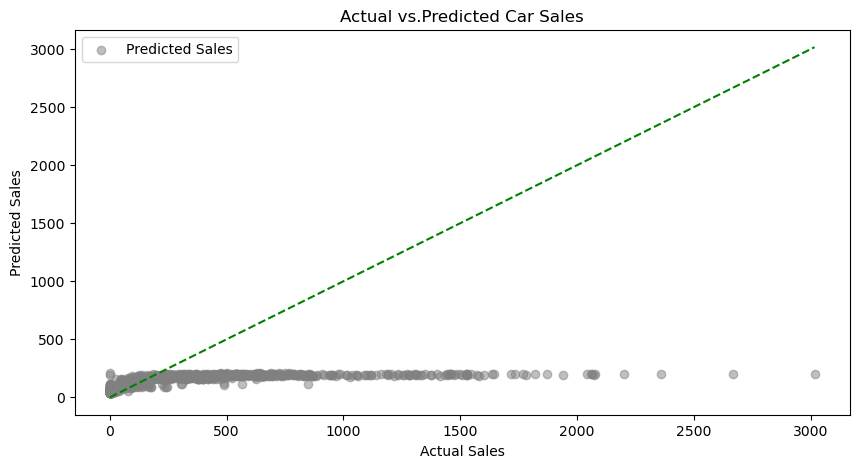

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, alpha=0.5, color="gray", label= "Predicted Sales")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], linestyle="--", color = "green")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title('Actual vs.Predicted Car Sales')
plt.legend()
plt.show()

In [21]:
future_makes = ["Toyota", "Volkswagen", "Mahindra", "Tata", "Volvo"]

future_predictions = {}
total_future_sales = 0

for make in future_makes:
    future_data = pd.DataFrame({
        "Year": [2028],
        "Month": [8],
        **{f"Make_{m}": [1 if m == make else 0] for m in future_makes},
    })
    future_data = future_data.reindex(columns=X.columns, fill_value=0)

    future_data_scaled = scaler.transform(future_data)

    future_sales = rf_model.predict(future_data_scaled)[0]
    future_predictions[make] = future_sales
    total_future_sales += future_sales
    
print("\n🚗 Predicted Car Sales for April 2029:")
for make, sales in future_predictions.items():
    print(f"{make}: {sales:.0f} units")

print(f"\n📊 Total Predicted Sales (August 2028): {total_future_sales:.0f} units")


🚗 Predicted Car Sales for April 2029:
Toyota: 186 units
Volkswagen: 191 units
Mahindra: 182 units
Tata: 185 units
Volvo: 182 units

📊 Total Predicted Sales (August 2028): 926 units


In [22]:
future_pct = {make: (sales / total_future_sales) * 100 for make, sales in future_predictions.items()}

print('\n📈 Predicted Market Share (%) for August 2028:')
for make, pct in future_pct.items():
    print(f"{make}: {pct:2f}%")


📈 Predicted Market Share (%) for August 2028:
Toyota: 20.135108%
Volkswagen: 20.605197%
Mahindra: 19.632629%
Tata: 19.995244%
Volvo: 19.631822%


C:\Users\mas12\AppData\Local\Temp\ipykernel_8024\1593697754.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Make", y="Predicted_Sales", data=future_sales_df, palette="Blues_r")
C:\Users\mas12\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


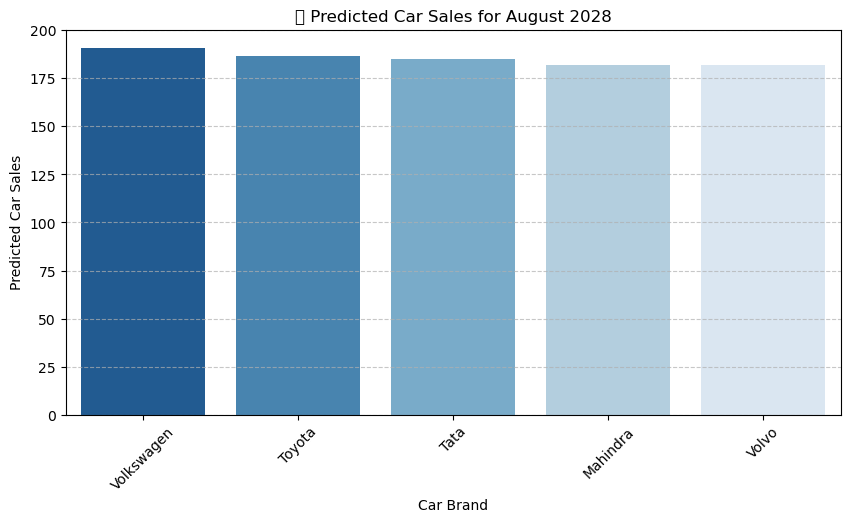

In [23]:
future_sales_df = pd.DataFrame(list(future_predictions.items()), columns=["Make", "Predicted_Sales"])

future_sales_df = future_sales_df.sort_values(by="Predicted_Sales", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Make", y="Predicted_Sales", data=future_sales_df, palette="Blues_r")

plt.xlabel("Car Brand")
plt.ylabel("Predicted Car Sales")
plt.title("🚗 Predicted Car Sales for August 2028")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()